In [1]:
import statsmodels.api as sa
import scikit_posthocs as sp
import pandas as pd
import numpy as np

In [21]:
# case='paired'
case='unpaired'

# raw_data=pd.read_excel('/mnt/nas/user/yixuan/Multiomics-benchmark-main/evaluation/workflow/scripts/graphs/'+case+'_inte.xlsx')
raw_data=pd.read_excel('/mnt/nas/user/yixuan/Multiomics-benchmark-main/evaluation/workflow/scripts/graphs/'+case+'_traj.xlsx')
raw_data

,datasets,Cobolt,PCA,scJoint,scMoMaT,Seurat4,Glue,scVI,scFoundation,UCE,Pamona,scGPT_zero,bindSC,iNMF,LIGER,Geneformer
0,Yao,0.8577,0.8225,0.7568,0.5072,0.6187,0.5809,0.6296,0.8964,0.7175,0.6711,0.7781,0.6803,0.5516,0.6286,0.6867
1,Muto-2021-batch-1,0.6592,0.6045,0.6277,0.8180,0.6188,0.7055,0.6467,0.8962,0.6066,0.5971,0.6629,0.5132,0.5086,0.3691,0.6854
2,Muto-2021-batch-2,0.8044,0.8309,0.7487,0.6064,0.7697,0.7231,0.7924,0.5006,0.7302,0.7999,0.5396,0.6628,0.4180,0.4431,0.1871
3,Muto-2021-batch-3,0.8211,0.7809,0.6697,0.7573,0.5802,0.6330,0.7580,0.6733,0.6754,0.7387,0.7750,0.5590,0.7714,0.4546,0.6379
4,Muto-2021-batch-4,0.8459,0.9123,0.7461,0.6943,0.8245,0.4933,0.5734,0.2567,0.2072,0.3831,0.2799,0.4327,0.4506,0.4950,0.2960
5,Muto-2021-batch-5,0.7165,0.6085,0.7913,NaN,0.5877,0.7817,0.4781,NaN,0.8950,NaN,NaN,NaN,0.3704,0.6691,NaN


In [22]:
raw_data.columns[1:]

Index(['Cobolt', 'PCA', 'scJoint', 'scMoMaT', 'Seurat4', 'Glue', 'scVI',
       'scFoundation', 'UCE', 'Pamona', 'scGPT_zero', 'bindSC', 'iNMF',
       'LIGER', 'Geneformer'],
      dtype='object')

In [23]:
dict_data={}
for i in raw_data.columns[1:]:
    dict_data[i]=raw_data[i].values

In [24]:

data = (
  pd.DataFrame(dict_data)
  .rename_axis('fold')
  .melt(
      var_name='datasets',
      value_name='score',
      ignore_index=False,
  )
  .reset_index()
)
data

,fold,datasets,score
0,0,Cobolt,0.8577
1,1,Cobolt,0.6592
2,2,Cobolt,0.8044
3,3,Cobolt,0.8211
4,4,Cobolt,0.8459
...,...,...,...
85,1,Geneformer,0.6854
86,2,Geneformer,0.1871
87,3,Geneformer,0.6379
88,4,Geneformer,0.2960


In [25]:
avg_rank = data.groupby('fold').score.rank(pct=True).groupby(data.datasets).mean()
avg_rank

datasets
Cobolt          0.855556
Geneformer      0.413333
Glue            0.529630
LIGER           0.303704
PCA             0.762963
Pamona          0.506667
Seurat4         0.477778
UCE             0.544444
bindSC          0.346667
iNMF            0.296296
scFoundation    0.573333
scGPT_zero      0.586667
scJoint         0.670370
scMoMaT         0.560000
scVI            0.570370
Name: score, dtype: float64

In [26]:
import scipy.stats as ss
import matplotlib.pyplot as plt
ss.friedmanchisquare(*dict_data.values())

FriedmanchisquareResult(statistic=nan, pvalue=nan)

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7f67718a00d0>)

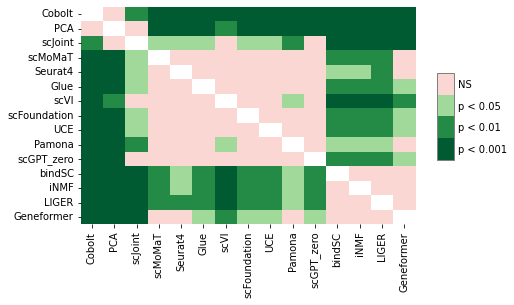

In [27]:
test_results = sp.posthoc_conover_friedman(
    data,
    melted=True,
    block_col='fold',
    group_col='datasets',
    y_col='score',
)
sp.sign_plot(test_results)

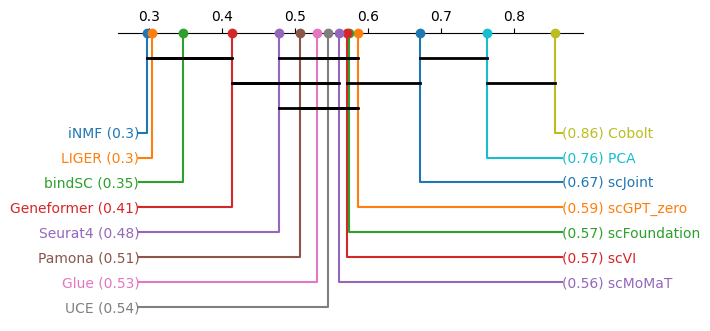

In [29]:
plt.figure(figsize=(6, 4), dpi=100)
# plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, test_results)
plt.savefig('/mnt/nas/user/yixuan/Multiomics-benchmark-main/evaluation/workflow/scripts/graphs/cdgraph_traj_'+case+'.eps', bbox_inches = 'tight')
# plt.savefig('/mnt/nas/user/yixuan/Multiomics-benchmark-main/evaluation/workflow/scripts/graphs/cdgraph_traj_'+case+'.png',dpi=300, bbox_inches = 'tight')